In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Carga del conjunto de datos:
Se carga un conjunto de datos desde un archivo CSV llamado "heart.csv".
Extracción de características y variable objetivo:
Se separan las características (X) y la variable objetivo (y) del conjunto de datos cargado.
Impresión de información:
Se imprime el nombre de las columnas del conjunto de datos.
Se imprime la matriz de características (X).
Se imprime el vector de la variable objetivo (y).

In [ ]:
dataset = pd.read_csv("/content/heart.csv")
print(dataset.columns)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[0 0 0 ... 0 1 0]


División del conjunto de datos:
Se divide el conjunto de características (X) y la variable objetivo (y) en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0): Esta línea divide las características (X) y la variable objetivo (y) en conjuntos de entrenamiento y prueba.
X_train: Conjunto de características de entrenamiento.
X_test: Conjunto de características de prueba.
y_train: Variable objetivo de entrenamiento.
y_test: Variable objetivo de prueba.
test_size: Proporción del conjunto de datos que se utilizará como conjunto de prueba (en este caso, 25%).
random_state: Semilla para garantizar reproducibilidad en la división de datos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Estandarización de características:
sc = StandardScaler(): Se crea un objeto StandardScaler, que se utilizará para estandarizar las características.
X_train = sc.fit_transform(X_train): Se ajusta el escalador a los datos de entrenamiento (X_train) y luego se transforman los datos de entrenamiento para que tengan una media de 0 y una desviación estándar de 1.
X_test = sc.transform(X_test): Se utiliza el mismo escalador para transformar los datos de prueba (X_test). Es importante notar que solo se llama a transform en los datos de prueba, ya que se utiliza la media y la desviación estándar aprendidas del conjunto de entrenamiento.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Entrenamiento del clasificador SVM:
from sklearn.svm import SVC: Importa la clase SVC de scikit-learn, que implementa un clasificador de máquina de vectores de soporte.
classifier = SVC(kernel='linear', random_state=0): Se crea un clasificador SVM con un kernel lineal y se establece una semilla aleatoria para reproducibilidad.
classifier.fit(X_train, y_train): Se entrena el clasificador utilizando los conjuntos de características y variables objetivo de entrenamiento (X_train y y_train, respectivamente).

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0 )
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Predicción con el conjunto de prueba:
y_pred = classifier.predict(X_test): Se utilizan las características del conjunto de prueba (X_test) para realizar predicciones utilizando el clasificador SVM entrenado.
classifier.predict(): Método que predice las etiquetas de clase para los datos de entrada proporcionados.
y_pred: Vector que contiene las etiquetas predichas para las muestras del conjunto de datos de prueba.

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 99  24]
 [ 12 122]]


Obtención de las clases únicas:
classes = dataset['target'].unique(): Esto parece estar extrayendo las clases únicas de la columna 'target' del DataFrame dataset.
Importación de bibliotecas:
from sklearn.metrics import ConfusionMatrixDisplay: Importa la clase ConfusionMatrixDisplay desde scikit-learn para visualizar la matriz de confusión.
import matplotlib.pyplot as plt: Importa la biblioteca matplotlib para generar visualizaciones.
Visualización de la matriz de confusión:
Se necesita una matriz de confusión (cm) para visualizarla. Esta matriz debe ser calculada previamente utilizando las predicciones (y_pred) y las etiquetas verdaderas (y_test).

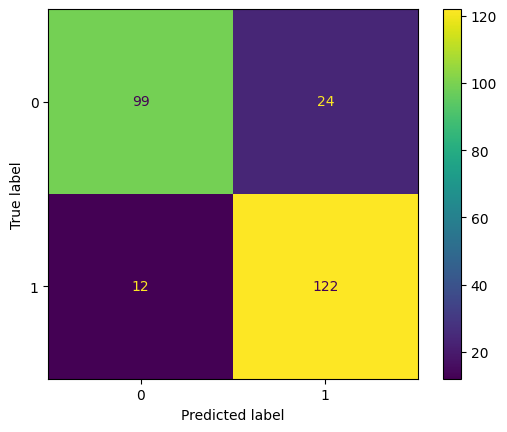

In [ ]:
classes= dataset['target'].unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

classification_report: Esta función genera un informe de clasificación que incluye métricas como precisión, recall, puntuación F1 y soporte para cada clase. Proporciona una descripción detallada del rendimiento del clasificador en términos de estas métricas.
accuracy_score: Esta función calcula la precisión del clasificador al comparar las etiquetas predichas con las etiquetas verdaderas. Devuelve la fracción de muestras correctamente clasificadas.

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

la función accuracy_score calcula la precisión del modelo de clasificación al comparar las etiquetas verdaderas con las etiquetas predichas, devolviendo la fracción de predicciones correctas. En este caso, el código print(accuracy_score(y_test, y_pred)) imprime la precisión del modelo en la consola.

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8599221789883269


print(classification_report(y_test, y_pred)) genera un informe de clasificación detallado que incluye métricas como precisión, recall, puntuación F1 y soporte para cada clase. Este informe proporciona una descripción completa del rendimiento del modelo de clasificación en términos de estas métricas para cada clase en el conjunto de datos de prueba.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       123
           1       0.84      0.91      0.87       134

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



In [ ]:
from sklearn.metrics import accuracy_score
import pickle

# Supongamos que ya tienes tus datos de prueba y las predicciones realizadas por el modelo
# y_test: etiquetas verdaderas, y_pred: etiquetas predichas

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Guarda la precisión en un archivo .pkl
with open('accuracy_model.pkl', 'wb') as file:
    pickle.dump(accuracy, file)


Precisión del modelo: 0.8599221789883269
